In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
df = pd.read_csv('/Users/kanikag/anaconda3/lib/python3.11/site-packages/pandas/io/parsers/loan.csv')

# Calculate the percentage of null values in each column
null_percentage = 100 * df.isnull().mean()

# Filter columns with more than 70% null values
columns_with_high_null_percentage = null_percentage[null_percentage > 70].index

# Display the result
print("Columns with more than 70% null values:")
print(columns_with_high_null_percentage)

print(df.shape)

# Drop columns with more than the threshold percentage of null values
df = df.drop(columns=columns_with_high_null_percentage)

print(df.shape)

df.isnull().sum()

Columns with more than 70% null values:
Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m',

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [19]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [22]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

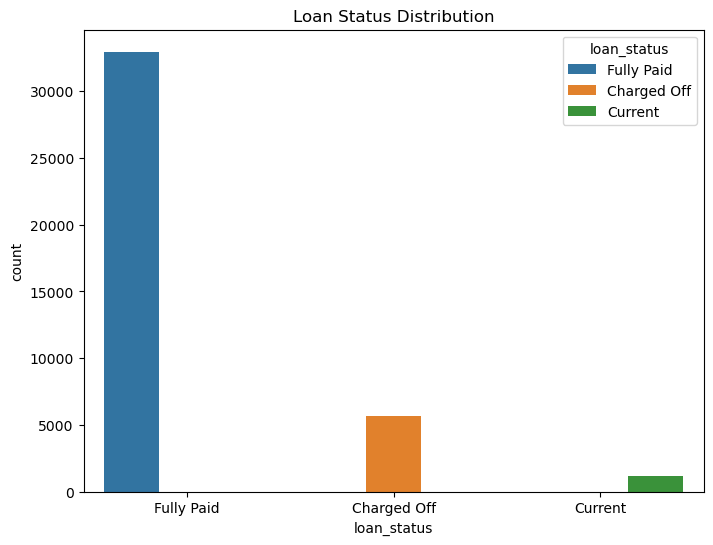

In [30]:
# Explore loan status distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', hue='loan_status', data=df)
plt.title('Loan Status Distribution')
plt.show()

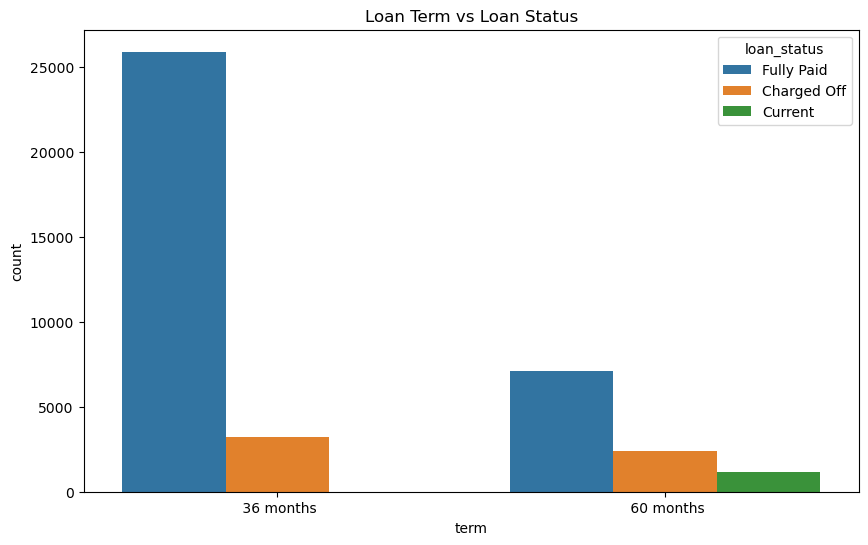

In [24]:
# Analyze the impact of loan term on default
plt.figure(figsize=(10, 6))
sns.countplot(x='term', hue='loan_status', data=df)
plt.title('Loan Term vs Loan Status')
plt.show()

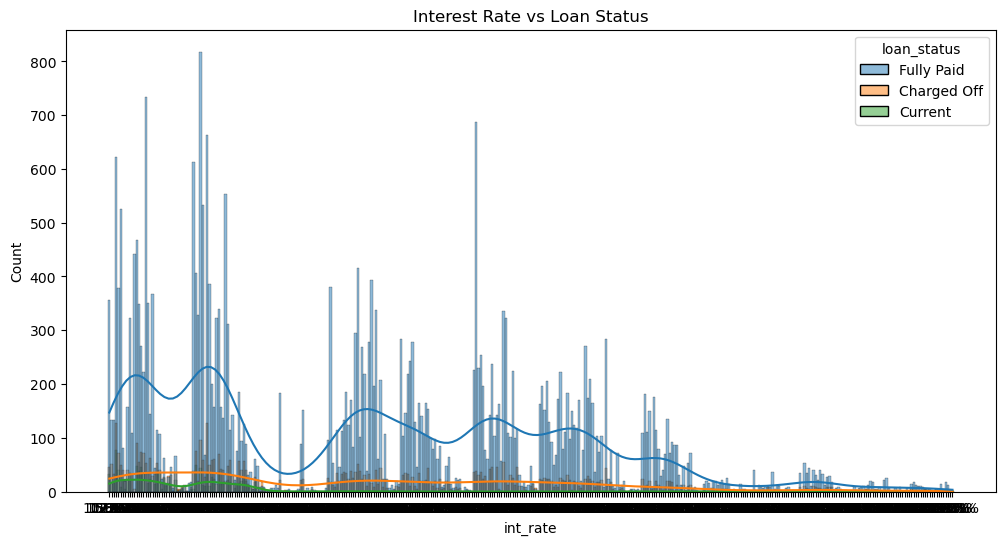

In [26]:
# Analyze the impact of interest rate on default
plt.figure(figsize=(12, 6))
sns.histplot(x='int_rate', hue='loan_status', data=df, bins=30, kde=True)
plt.title('Interest Rate vs Loan Status')
plt.show()

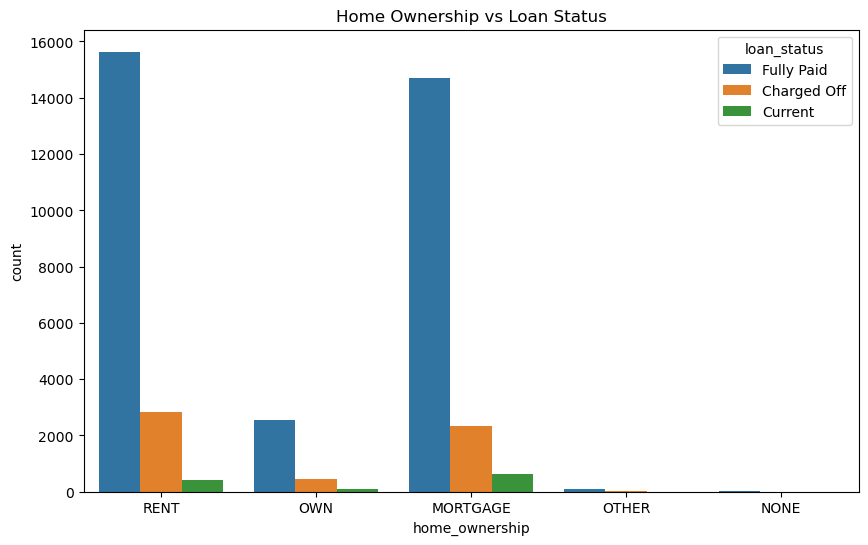

In [27]:
# Analyze the impact of home ownership on default
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.title('Home Ownership vs Loan Status')
plt.show()

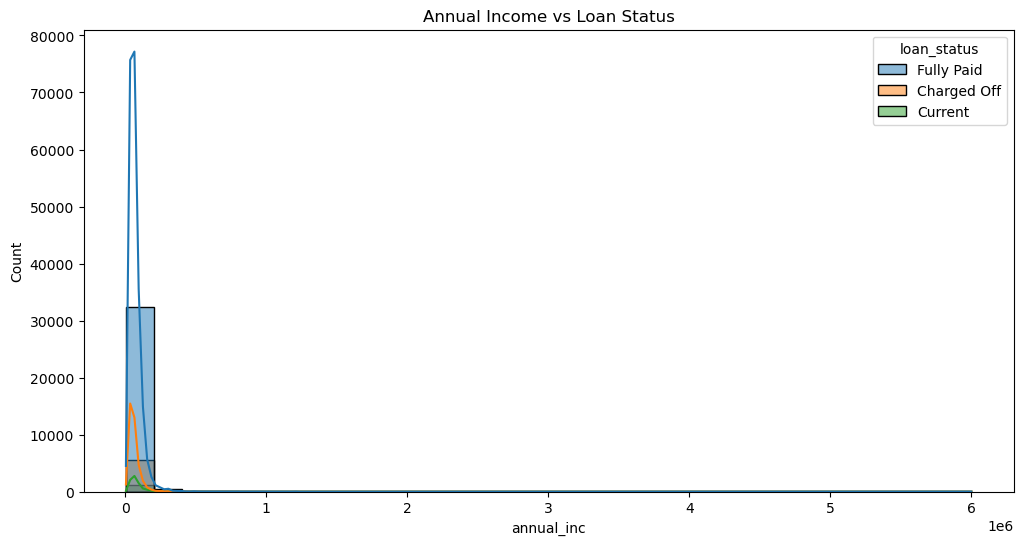

In [28]:
# Analyze the impact of annual income on default
plt.figure(figsize=(12, 6))
sns.histplot(x='annual_inc', hue='loan_status', data=df, bins=30, kde=True)
plt.title('Annual Income vs Loan Status')
plt.show()


In [31]:
#analysis
#Loan Term vs Loan Status:
#Loans with longer terms (60 months) seem to have a higher frequency of default compared to shorter-term loans (36 months).

#Interest Rate vs Loan Status:
#Higher interest rates are associated with a higher likelihood of default. Borrowers with higher interest rates are more likely to default on their loans.

#Annual Income vs Loan Status:
#There seems to be a potential correlation between lower annual income and loan default. Borrowers with lower income may be at a higher risk of default.